<a href="https://colab.research.google.com/github/Matheusbcy/22-machine-learning-projects/blob/main/Basico/iris/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np

# Definindo problema

1. Qual a variavel target(alvo)?  
**RESPOSTA**: Classificar qual tipo de planta (Iris-setosa, Iris-versicolor, Iris-virginica) é de acordo com algumas caracteristicas.
2. Qual tipo de classificação?  
**RESPOSTA**:Binaria
3. Qual contexto do negocio?  
**RESPOSTA**: Classificação automática de espécies de plantas

# Coleta de dados

1. **Identificar fonte dos dados.**  
Dados obtidos na UCI Machine Learning [Dataset](https://archive.ics.uci.edu/dataset/53/iris)
2. **Verificar disponibilidade e qualidade.**
* Dados publicos ✅  
* Sem valores nulos ✅  
* Balanceamento de classes (50 cada) ✅
* Sem duplicatas criticas ✅  

# Documentação das variaveis

#### **Fonte Original:**

**Criador**: Ronald Fisher (1936)
**Publicação**: "The use of multiple measurements in taxonomic problems"  
**Contexto**: Estudo pioneiro em análise discriminante e taxonomia vegetal

#### **Coleta dos dados:**

**Periodo**: Década e 1930  
**Local**: Jardim Botânico/Estação Experimental  
**Coletor**: Edgar Anderson (Mentor de fiser)  
**Método:** Medição manuais com precisão de 0.1 cm

### **Significado das variáveis**

1. **sepa_lenght (comprimento da sépala)**

```
# Característica: Comprimento da sépala
# Unidade: Centímetros (cm)
# Range típico: 4.3 - 7.9 cm
# Significado biológico: Proteção do botão floral
# Importância: Indicador de tamanho geral da flor
```
2. **sepal_width (largura da Sépala)**

```
# Característica: Largura da sépala  
# Unidade: Centímetros (cm)
# Range típico: 2.0 - 4.4 cm
# Significado biológico: Estrutura de suporte
# Importância: Relacionada à robustez da flor
```
3. **petal_length (Comprimento da Pétala)**

```
# Característica: Comprimento da pétala
# Unidade: Centímetros (cm)
# Range típico: 1.0 - 6.9 cm
# Significado biológico: Atrativo para polinizadores
# Importância: Característica mais discriminante entre espécies
```
4. **petal_width (Largura da Pétala)**

```
# Característica: Largura da pétala
# Unidade: Centímetros (cm)
# Range típico: 0.1 - 2.5 cm
# Significado biológico: Superfície de pouso para polinizadores
# Importância: Segunda característica mais discriminante
```
5. **species (Espécie)**

```
# Variável alvo: Classificação taxonômica
# Tipo: Categórica (3 classes)
# Valores:
#   - 'Iris-setosa' (nativa do Alasca/Canadá)
#   - 'Iris-versicolor' (nativa da América do Norte)  
#   - 'Iris-virginica' (nativa da América do Norte)
# Significado: Identidade biológica da planta
```




In [40]:
colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [41]:
df = pd.read_csv("/content/iris.data", names = colunas)

In [42]:
np.unique(df["species"].value_counts())

array([50])

In [43]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [45]:
df.duplicated().sum()

np.int64(3)

In [46]:
df.drop_duplicates(inplace = True)

# Prepração para a modelagem

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [48]:
X = df.drop(["species"], axis = 1)

In [49]:
y = df["species"].values

In [50]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)

# Modelagem

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

## Tuning de parametros

### Arvore de decisão

In [53]:
params = {"criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1,  5, 10]}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'} 0.9572463768115942


### Random Forest

In [54]:
params = {"n_estimators": [10, 40, 100, 150],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1,  5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100} 0.9746376811594203


### kNN

In [55]:
params = {"n_neighbors": [3, 5, 10, 20], "p": [1, 2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'n_neighbors': 5, 'p': 2} 0.9826086956521738


### SVM

In [56]:
params = {"tol": [0.001, 0.0001, 0.00001],
              "C": [1.0, 1.5, 2.0],
              "kernel": ["rbf", "linear", "poly", "sigmoid"]}

grid_search = GridSearchCV(estimator=SVC(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'C': 1.0, 'kernel': 'linear', 'tol': 0.001} 0.9916666666666668


### Redes neurias

In [ ]:
params = {"batch_size": [10, 56],
              "solver": ["adam", "sgd"],
              "activation": ["relu", "logistic", "tanh"]}

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

## Validação cruzada

In [58]:
result_tree = []
results_random_forest = []
results_kNN = []
results_svm = []
results_rede_neural = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 1, min_samples_split = 10, splitter = "random")
  scores = cross_val_score(tree, X_train, y_train, cv = kfold)
  result_tree.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = "gini", min_samples_leaf = 10, min_samples_split = 2, n_estimators = 40)
  scores = cross_val_score(random_forest, X_train, y_train, cv = kfold)
  results_random_forest.append(scores.mean())

  knn  = KNeighborsClassifier(n_neighbors = 5, p= 2)
  scores = cross_val_score(knn, X_train, y_train, cv = kfold)
  results_kNN.append(scores.mean())

  svm = SVC(kernel = "linear", C = 1.0, tol = 0.001)
  scores = cross_val_score(svm, X_train, y_train, cv = kfold)
  results_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = "relu", batch_size = 10, solver = "adam", max_iter=2000)
  scores = cross_val_score(rede_neural, X_train, y_train, cv = kfold)
  results_rede_neural.append(scores.mean())

In [59]:
results = pd.DataFrame({
    "Arvore": result_tree,
    "Random forest": results_random_forest,
    "KNN": results_kNN,
    "SVM": results_svm,
    "Rede neural": results_rede_neural
})
results.describe()

,Arvore,Random forest,KNN,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.949571,0.952551,0.974722,0.982904,0.975884
std,0.018005,0.009604,0.005348,0.004698,0.006357
min,0.906061,0.931061,0.965909,0.964394,0.957576
25%,0.939583,0.948485,0.973485,0.982576,0.974242
50%,0.945076,0.956439,0.974242,0.983333,0.975000
75%,0.957576,0.957576,0.975000,0.983333,0.982576
max,0.983333,0.966667,0.983333,0.991667,0.983333


In [60]:
svm_model = svm.fit(X_train, y_train)
pred = svm_model.predict(X_test)

# Avaliação

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
import seaborn as sns

In [63]:
accuracy_score(y_test, pred)

0.9666666666666667

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

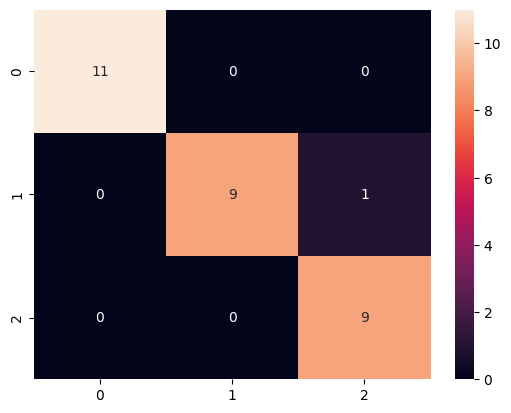

In [65]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True)
cm

# Análise Comparativa de Modelos de Classificação

## **Ranking de Performance Geral**

1. SVM - 98.29% (mean)
2. Rede Neural - 97.55% (mean)
3. KNN - 97.47% (mean)
4. Random Forest - 95.33% (mean)
5. Árvore - 94.88% (mean)

### **Análise Detalhada por Modelo**

#### SVC (melhor perfomance)

```
Vantagens:
• Maior acurácia média: 98.29%
• Menor variabilidade (std: 0.47%) - mais consistente
• Performance máxima impressionante: 99.17%

Considerações:
• Pode ser computacionalmente intensivo
• Sensível a escala dos dados
```

#### Rede Neural

```
Vantagens:
• Segunda melhor performance: 97.55%
• Boa consistência (std: 0.58%)
• Alta performance máxima: 99.09%
Considerações:
• Complexidade interpretativa
• Maior custo computacional
• Risco de overfitting
```
#### KNN

```
Vantagens:
• Terceira melhor performance: 97.47%
• Excelente consistência (std: 0.53%)
• Performance mínima alta: 96.59%
Considerações:
• Computacionalmente caro em produção
• Sensível a escala e dimensionalidade
```
#### Random Forest

```
Vantagens:
• Robustez a overfitting
• Boa interpretabilidade
• Feature importance nativa

Desvantagens:
• Performance significativamente menor
• Maior variabilidade que os top 3
```
#### Árvore de Decisão

```
Desvantagens:
• Menor performance geral
• Maior variabilidade (std: 1.64%)
• Provável overfitting
```




### Analise de trade/off

* Para alta performance: SVM

* Para balance performance/interpretabilidade: Random Forest

* Para consistência: KNN ou SVM

# Conclusão preliminar

**SVM emerge como forte candidato devido à:**  
* ✅ Melhor performance absoluta

* ✅ Maior consistência

* ✅ Alta performance mínima (menor risco)

# **Possivel perguntas e respostas**

1. Precisa explicar decisões para não-técnicos? → Random Forest

2. Cada 0.1% de acurácia vale milhões? → SVM

3. Precisa de estabilidade acima de tudo? → KNN ou SVM

4. Recursos computacionais limitados? → KNN (inferência) ou Random Forest